# Model Optimization 2

I have 
* deleted one more column
* added one more layer
* added more units
* added more epochs

## Preprocessing

In [36]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

In [37]:
#  Import and read the charity_data.csv.
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [38]:
#summary
application_df.describe()

,EIN,STATUS,ASK_AMT,IS_SUCCESSFUL
count,3.429900e+04,34299.000000,3.429900e+04,34299.000000
mean,5.191852e+08,0.999854,2.769199e+06,0.532406
std,2.451472e+08,0.012073,8.713045e+07,0.498956
min,1.052060e+07,0.000000,5.000000e+03,0.000000
25%,2.748482e+08,1.000000,5.000000e+03,0.000000
50%,4.656317e+08,1.000000,5.000000e+03,1.000000
75%,7.526117e+08,1.000000,7.742000e+03,1.000000
max,9.960869e+08,1.000000,8.597806e+09,1.000000


In [39]:
#looking for nulls
application_df.isnull().sum()

EIN                       0
NAME                      0
APPLICATION_TYPE          0
AFFILIATION               0
CLASSIFICATION            0
USE_CASE                  0
ORGANIZATION              0
STATUS                    0
INCOME_AMT                0
SPECIAL_CONSIDERATIONS    0
ASK_AMT                   0
IS_SUCCESSFUL             0
dtype: int64

In [40]:
application_df.count()

EIN                       34299
NAME                      34299
APPLICATION_TYPE          34299
AFFILIATION               34299
CLASSIFICATION            34299
USE_CASE                  34299
ORGANIZATION              34299
STATUS                    34299
INCOME_AMT                34299
SPECIAL_CONSIDERATIONS    34299
ASK_AMT                   34299
IS_SUCCESSFUL             34299
dtype: int64

In [41]:
# Determine the number of unique values in each column.
application_df.nunique()

EIN                       34299
NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [42]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
## I drop ' ASK_AMT ' as well, too many different values

application_df.drop(columns=["EIN","NAME","ASK_AMT"], inplace=True)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,1


In [43]:
# Look at APPLICATION_TYPE value counts for binning
app_type_count = application_df["APPLICATION_TYPE"].value_counts()
app_type_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [44]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(app_type_count.loc[app_type_count<500].index)
application_types_to_replace

['T9', 'T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']

In [45]:
# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [46]:
# Look at CLASSIFICATION value counts for binning
classif_count = application_df["CLASSIFICATION"].value_counts()

In [47]:
# You may find it helpful to look at CLASSIFICATION value counts >1
(classif_count > 1).sum()

45

In [48]:
classif_count[classif_count>1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [49]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(classif_count.loc[classif_count<500].index)

In [50]:
# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [51]:
# Convert categorical data to numeric with `pd.get_dummies`
app_to_numeric = pd.get_dummies(application_df)
app_to_numeric.head()

,STATUS,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [52]:
app_to_numeric.describe()

,STATUS,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
count,34299.000000,34299.000000,34299.000000,34299.000000,34299.000000,34299.000000,34299.000000,34299.000000,34299.000000,34299.000000,...,34299.000000,34299.000000,34299.000000,34299.000000,34299.000000,34299.000000,34299.000000,34299.000000,34299.000000,34299.000000
mean,0.999854,0.532406,0.008047,0.015394,0.031050,0.788274,0.044958,0.034199,0.035453,0.021138,...,0.021225,0.015831,0.098370,0.006997,0.027843,0.109245,0.004053,0.005394,0.999213,0.000787
std,0.012073,0.498956,0.089344,0.123116,0.173457,0.408538,0.207214,0.181743,0.184924,0.143845,...,0.144136,0.124825,0.297819,0.083358,0.164526,0.311951,0.063532,0.073245,0.028046,0.028046
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
# How many columns       ---------------> 43
app_to_numeric.columns.size

44

In [54]:
app_to_numeric["IS_SUCCESSFUL"].value_counts()

1    18261
0    16038
Name: IS_SUCCESSFUL, dtype: int64

In [55]:
# Split our preprocessed data into our features and target arrays
X = app_to_numeric.drop(columns="IS_SUCCESSFUL").values
y = app_to_numeric["IS_SUCCESSFUL"].values

In [56]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=31)

In [57]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [58]:
# shape
X_test_scaled.shape

(8575, 43)

In [59]:
X_train_scaled.shape

(25724, 43)

## Compile, Train and Evaluate the Model

In [60]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input2 = X_train_scaled.shape[1]
node1 = 80
node2 = 40
node3 = 40
# add a new 3° layer

In [61]:

nn3 = tf.keras.models.Sequential()

# First hidden layer
nn3.add(tf.keras.layers.Dense(units=node1, activation='relu', input_dim=input2))

# Second hidden layer
nn3.add(tf.keras.layers.Dense(units=node2, activation='relu'))

# Third hidden layer
nn3.add(tf.keras.layers.Dense(units=node3, activation='relu'))

# Output layer
nn3.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 80)                3520      
                                                                 
 dense_5 (Dense)             (None, 40)                3240      
                                                                 
 dense_6 (Dense)             (None, 40)                1640      
                                                                 
 dense_7 (Dense)             (None, 1)                 41        
                                                                 
Total params: 8,441
Trainable params: 8,441
Non-trainable params: 0
_________________________________________________________________


In [62]:
# Compile the model
nn3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [63]:
# Train the model
fit_model_3 = nn3.fit(X_train_scaled, y_train, epochs=200)

Epoch 1/200
804/804 [==============================] - 5s 4ms/step - loss: 0.5733 - accuracy: 0.7191
Epoch 2/200
804/804 [==============================] - 3s 3ms/step - loss: 0.5569 - accuracy: 0.7292
Epoch 3/200
804/804 [==============================] - 3s 4ms/step - loss: 0.5543 - accuracy: 0.7287
Epoch 4/200
804/804 [==============================] - 3s 4ms/step - loss: 0.5515 - accuracy: 0.7278
Epoch 5/200
804/804 [==============================] - 3s 3ms/step - loss: 0.5513 - accuracy: 0.7309
Epoch 6/200
804/804 [==============================] - 3s 3ms/step - loss: 0.5498 - accuracy: 0.7298
Epoch 7/200
804/804 [==============================] - 3s 3ms/step - loss: 0.5491 - accuracy: 0.7321
Epoch 8/200
804/804 [==============================] - 3s 4ms/step - loss: 0.5486 - accuracy: 0.7319
Epoch 9/200
804/804 [==============================] - 3s 4ms/step - loss: 0.5479 - accuracy: 0.7323
Epoch 10/200
804/804 [==============================] - 3s 3ms/step - loss: 0.5471 - accura

In [65]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5739 - accuracy: 0.7322 - 703ms/epoch - 3ms/step
Loss: 0.5738562345504761, Accuracy: 0.7322449088096619


In [66]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model_3.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

<AxesSubplot:>

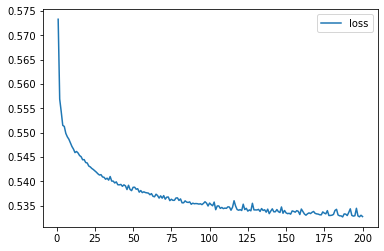

In [67]:
# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

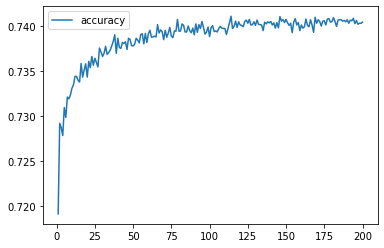

In [68]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [69]:
# Export our model to HDF5 file
nn3.save("Exports/Result_Model3.h5")

### Result for model 3:
#### Loss: 0.57, Accuracy: 0.73
#### Very similar result than model 1 and 2